# 목표
- Random Forest 알고리즘을 사용해 모델의 변수 중요도 파악
- **⭐ 중요한 Feature 를 정해 EDA를 수행하기 위해서 진행 ⭐**

In [1]:
# 미리 이용할 폴더의 path를 정합니다.
# 파일 집어넣을곳 폴더자체를 지정합니다.

path =

## Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 자동완성 안될까봐 미리 설정하는 것
%config Completer.use_jedi = False

강사님이 제공해주신 코드입니다.

솔직히 복잡하니 이걸로 중요도가 자동으로 튀어나온다 정도로만 기억합니다.

In [3]:
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(10,20))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df

## Load Datasets

In [4]:
df_train = pd.read_csv(path + 'data01_train.csv')
df_test = pd.read_csv(path + 'data01_train.csv')
df_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,0.277194,-0.012389,-0.131974,-0.994046,-0.940578,-0.917337,-0.994261,-0.932830,-0.908088,-0.936219,...,-0.690363,-0.034888,-0.261437,-0.391477,-0.877612,-0.912365,0.114009,0.080146,21,SITTING
5877,0.191568,0.013328,-0.105174,-0.126969,-0.121729,-0.327480,-0.192523,-0.109923,-0.295286,0.078644,...,-0.879215,0.721718,0.623151,0.866858,-0.445660,-0.690278,0.303194,-0.044188,15,WALKING_UPSTAIRS
5878,0.267981,-0.018348,-0.107440,-0.991303,-0.989881,-0.990313,-0.992386,-0.988852,-0.991237,-0.936099,...,-0.886851,0.060173,0.228739,0.684400,-0.216665,0.620363,-0.437247,-0.571840,19,LAYING
5879,0.212787,-0.048130,-0.121001,-0.041373,0.052449,-0.585361,-0.100714,0.023353,-0.554707,0.219814,...,-0.053556,0.260880,0.551742,-0.943773,-0.862899,-0.718009,0.292856,0.024920,6,WALKING_UPSTAIRS


## Preprocessing

In [5]:
from sklearn.model_selection import train_test_split
x = df_train.drop('Activity', axis=1)
y = df_train['Activity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y) #  stratify=y 는 분류 모델에서 데이터세트 나눌때 Class가 일정비율이 되게 나눠줍니다

# 데이터셋 나눈뒤에는  shape를 확인하는것을 권유합니다 (실수방지목표)
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((4704, 562), (1177, 562), (4704,), (1177,))

## Modeling

In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=12) # 과적합 방지를 위한 가지치기

model.fit(x_train,y_train)

model.score(x_test,y_test)

0.9711129991503823

## ⭐ 중요한 Feature 확인 ⭐

아래 코드는 그래프 그리는것을 실패하신 분들을 위해서 그렸습니다

강사님 화면에서도 글자는 미친듯이 겹쳐있었으니 딱 표현까지만 해봅니다

~~솔직히 시각화의 의미가 전혀 없기 때문에 (시각화의 목표는 자료의 직관적인 분석을 위해)~~

해당코드는 못외웠다고 좌절할 이유가 전혀 없습니다(저도 코랩 자동완성으로 함)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       223
           SITTING       0.95      0.93      0.94       206
          STANDING       0.94      0.95      0.94       218
           WALKING       0.99      0.97      0.98       200
WALKING_DOWNSTAIRS       0.97      0.98      0.98       158
  WALKING_UPSTAIRS       0.98      1.00      0.99       172

          accuracy                           0.97      1177
         macro avg       0.97      0.97      0.97      1177
      weighted avg       0.97      0.97      0.97      1177



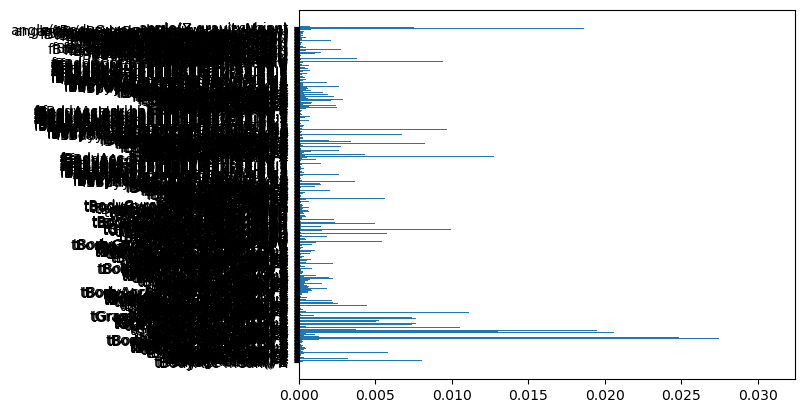

In [7]:
# 변수 중요도 추출(시각화로 나타내기)

from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
plt.barh(list(x_train),model.feature_importances_)
plt.show()

### ⭐

In [8]:
# 강사님이 제공해준 함수를 드디어 써먹습니다. 정렬까지 해주는 멋진 코드지만 안외워도 될듯합니다.
import_data1 = plot_feature_importance(model.feature_importances_, x_train.columns, result_only=True, topn=len(x_train))
# 중요도 상위 top 5
import_data1.head()
# 중요도 하위 top 5
import_data1.tail()

,feature_name,feature_importance
557,"fBodyAccJerk-bandsEnergy()-57,64",0.000089
558,"fBodyAcc-bandsEnergy()-17,32.1",0.000072
559,"fBodyAcc-bandsEnergy()-49,56.2",0.000070
560,"tBodyGyro-arCoeff()-X,3",0.000061
561,fBodyAccMag-maxInds,0.000057


**위에서 나온 상위 5개의 변수를 선정해서 target과의 관계를 kdeplot으로 그려보세요!**

~~라~고 되어있지만 위 내용과 똑같이 시각화가 아주 큰 의미를 가지지 않습니다..~~

볼만한게 있다면 각 변수별 분포가 크게 달라 분리가 가능하겠네? 정도로 독립성을 가진다 정도로만 봐도 될것같습니다.

상위 5개 뽑는 코드인데 시간나면 하위 5개도 해보세요

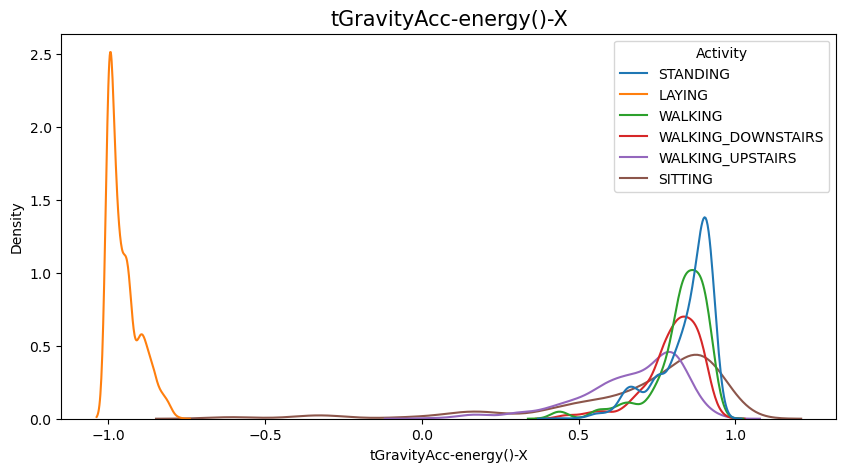

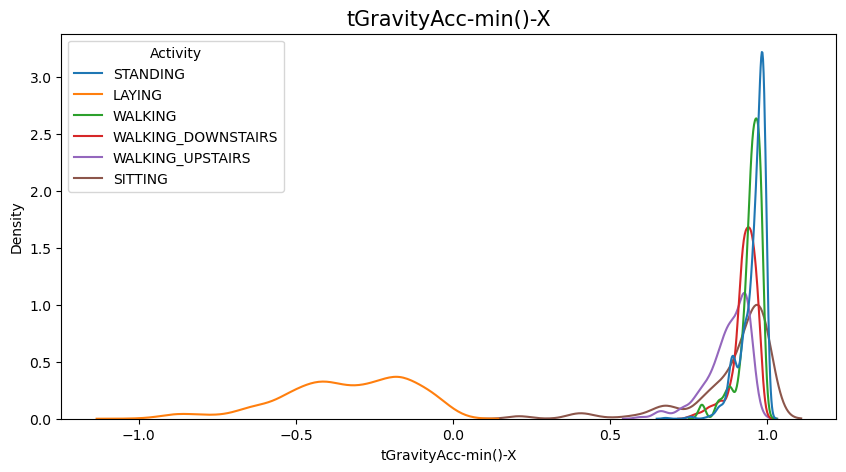

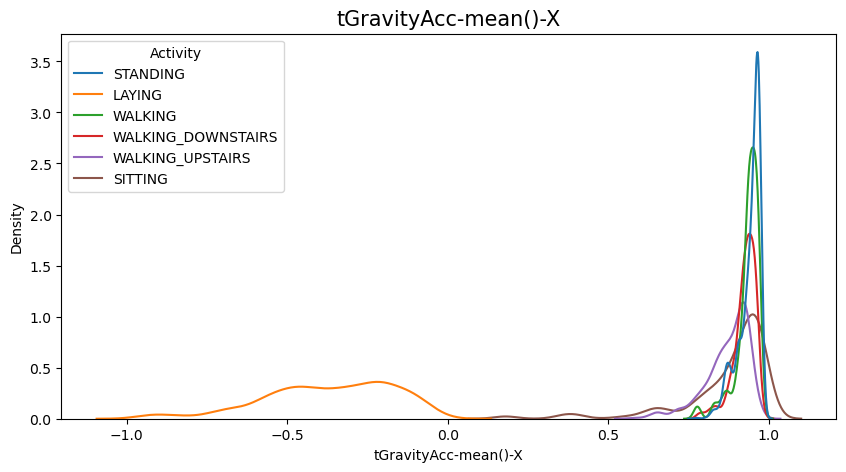

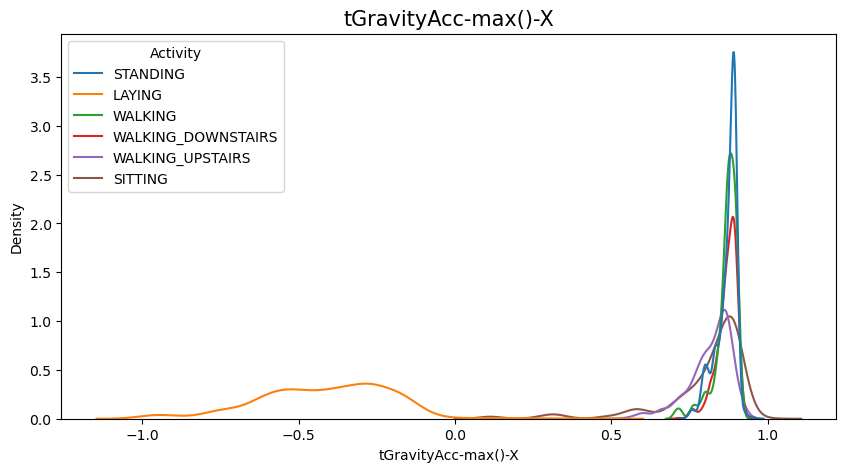

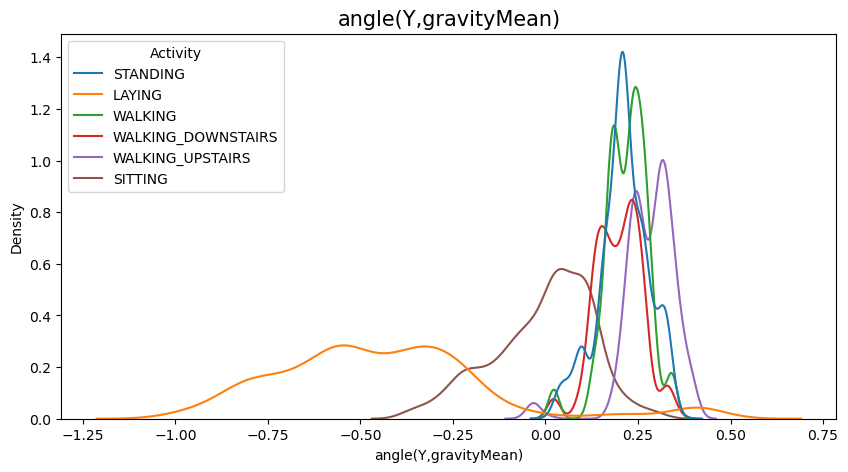

In [9]:
for i in range(0,5):
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=df_train, x=import_data1['feature_name'][i], hue='Activity')
    plt.title(import_data1['feature_name'][i], fontsize=15)
    plt.show()

# 정적/동적 행동으로 구분하여 분석

## Preprocessing
아래 코드는 위에서 진행한내용과 거의 동일합니다.

차이점이 존재하긴하니 찾아보면 도움될겁니다.

In [10]:
df_train = pd.read_csv(path + 'data01_train.csv')
df_test = pd.read_csv(path + 'data01_train.csv')

# 움직임 = 1, 안움직임 = 0
df_train['is_dynamic'] = np.where((df_train['Activity'] == 'STANDING') | (df_train['Activity'] == 'SITTING') | (df_train['Activity'] == 'LAYING'), 0, 1)
df_train['is_dynamic'].value_counts()

x = df_train.drop(['Activity', 'is_dynamic'], axis=1)
y = df_train['is_dynamic']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4704, 562), (1177, 562), (4704,), (1177,))

## Modeling

In [11]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9991503823279524

## ⭐ 중요한 Feature 확인 ⭐

In [12]:
import_data2 = plot_feature_importance(model.feature_importances_, x_train.columns, result_only=True, topn=len(x_train))

import_data2.head()

import_data2.tail()

,feature_name,feature_importance
557,tGravityAccMag-mad(),0.0
558,tGravityAccMag-std(),0.0
559,tGravityAccMag-mean(),0.0
560,tBodyAccMag-arCoeff()4,0.0
561,subject,0.0


# 합치기 & 저장하기

In [13]:
# tip : rename을 써서 칼럼 이름 수정을 해야합니다!
import_data1.rename(columns={'feature_importance':'feature_importance_1'}, inplace=True)
import_data2.rename(columns={'feature_importance':'feature_importance_2'}, inplace=True)

import_data = pd.merge(import_data1, import_data2, on='feature_name', how='outer')


위 방법대로 합치기만 하면 정렬이 안되어 순서가 엉망입니다.

정렬 후 저장하도록합니다.

강의와 다르게 **추후에 활용할 수 있도록 csv로 파일을 저장**했습니다.

In [14]:
import_data.sort_values(by='feature_importance_1', ascending=False).to_csv(path + 'import_sort_data.csv')
import_data.to_csv(path + 'import_data.csv')